<a href="https://colab.research.google.com/github/sanabriadiego/hearth-disease-prediction/blob/main/hearth_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [3]:
df = pd.read_csv('processed.cleveland.data', names=columns)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


We can see that on our dataset the columns 'ca' and 'thal' are of the type object, because they have numbers and the character '?'. We can check this with the unique() method.

In [5]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

We transform the object values to float, including the '?' character. The errors attibute can turn invalid values into NaN. We apply this to columns ca and thal.

In [6]:
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')

In [7]:
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

In [8]:
df['thal'].unique()

array([ 6.,  3.,  7., nan])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


Now we can drop the rows that have a NaN value. For this specific dataset we can consider that since it is a medical application we shouldn't try to infer new values.

In [10]:
df2 = df.copy()
df2 = df2.dropna()

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


Now we work with df2 and change the values for the num column to only 1 and 0.

In [12]:
df2['num'].unique()

array([0, 2, 1, 3, 4])

In [13]:
df2.loc[df2["num"] != 0, "num"] = 1

In [14]:
df2['num'].unique()

array([0, 1])

In [15]:
df2['num'].value_counts()

0    160
1    137
Name: num, dtype: int64

<Axes: xlabel='age', ylabel='chol'>

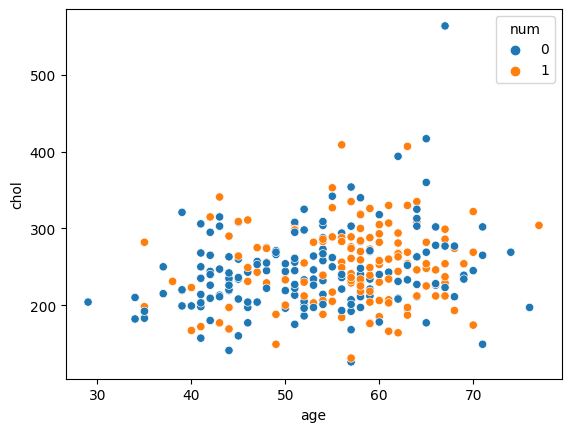

In [16]:
sns.scatterplot(x=df2['age'], y=df2['chol'], hue=df2['num'])

<Axes: xlabel='age', ylabel='Count'>

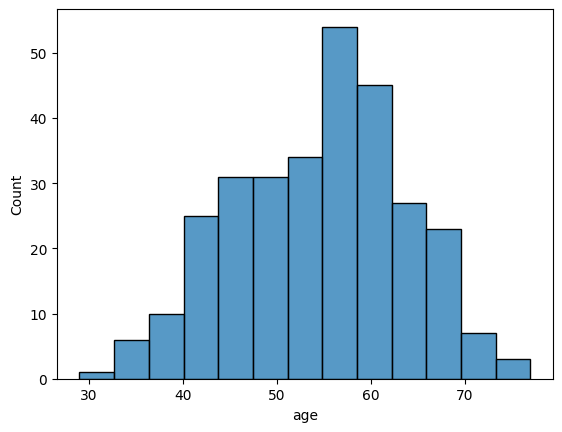

In [17]:
sns.histplot(df2['age'])

<Axes: xlabel='age', ylabel='Count'>

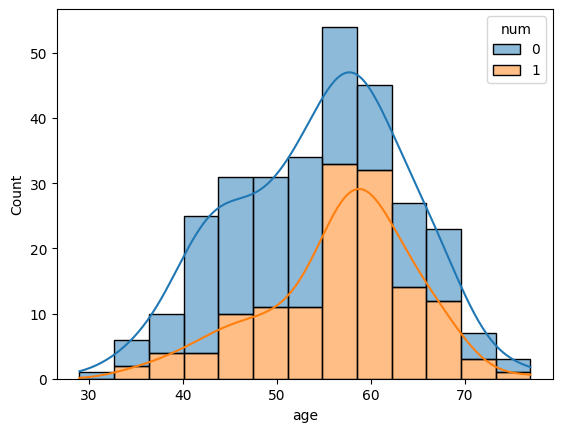

In [18]:
sns.histplot(data=df2, x='age', hue='num', multiple="stack", kde=True)

In [19]:
x = df2[columns[:-1]]
y = df2[columns[-1]]

In [20]:
x_values = x.values
y_values = y.values

In [21]:
print(f'Our Features are {x_values}')
print(f'Shape of Features: {x_values.shape}')
print(f'Our Targets are {y_values}')
print(f'Shape of Targets: {y_values.shape}')

Our Features are [[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [68.  1.  4. ...  2.  2.  7.]
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]]
Shape of Features: (297, 13)
Our Targets are [0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1
 1]
Shape of Targets: (297,)


In [22]:
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Now we split our data so we can work on different algorithms and check the accuracy for each of them. Which algorithm is better?
We set a 60% for our train data and the rest 40% will be equally divided between test set and cross validation set.

In [23]:
x_train, x_, y_train, y_ = train_test_split(x_values, y_values, test_size=0.40, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

In [24]:
del x_
del y_
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (178, 13)
the shape of the training set (target) is: (178,)

the shape of the cross validation set (input) is: (59, 13)
the shape of the cross validation set (target) is: (59,)

the shape of the test set (input) is: (60, 13)
the shape of the test set (target) is: (60,)


We need to scale the values so we can easily work on them, there is a big difference between the values of the columns.

In [31]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test)
x_cv_norm = scaler.transform(x_cv)

Since this is a 1/0 problem we can use Logistic Regression to start

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr_model = LogisticRegression()
lr_model.fit(x_train_norm, y_train)

LogisticRegression()

In [34]:
y_pred_lr = lr_model.predict(x_test_norm)

In [35]:
print("Accuracy on training set:", lr_model.score(x_train_norm, y_train))

Accuracy on training set: 0.8820224719101124


In [36]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78        35
           1       0.68      0.84      0.75        25

    accuracy                           0.77        60
   macro avg       0.77      0.78      0.77        60
weighted avg       0.79      0.77      0.77        60



In [37]:
import xgboost as xgb

In [38]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train_norm, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [39]:
y_pred_xgb = xgb_model.predict(x_test_norm)

In [40]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.84      0.64      0.73        25

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.78        60
weighted avg       0.81      0.80      0.79        60



In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
nn_model = Sequential(
    [
        tf.keras.Input(shape=(13,)),
        Dense(units = 10, activation = 'sigmoid'),
        Dense(units = 5, activation = 'sigmoid'),
        Dense(units = 1, activation = 'sigmoid')
    ]
)

In [52]:
nn_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(0.001),)

In [53]:
nn_model.fit(x_train_norm, y_train, epochs=500, verbose=0)

In [54]:
y_predict_nn = nn_model.predict(x_test_norm)

2/2 [==============================] - 0s 6ms/step


In [55]:
y_pred_nn = np.zeros(len(y_predict_nn))
for i in range(len(y_predict_nn)):
  if y_predict_nn[i] >= 0.5:
    y_pred_nn[i] = 1
  else:
    y_pred_nn[i] = 0

In [56]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78        35
           1       0.68      0.84      0.75        25

    accuracy                           0.77        60
   macro avg       0.77      0.78      0.77        60
weighted avg       0.79      0.77      0.77        60



Now we check which algorithm is better through the mean squared error.

In [57]:
from sklearn.metrics import mean_squared_error

For Logistic Regression

In [58]:
y_pred_lr_cv = lr_model.predict(x_cv_norm)

In [59]:
mse_lr = mean_squared_error(y_cv, y_pred_lr_cv) / 2
print(f'The MSE for Logistic Regression is: {mse_lr}')

The MSE for Logistic Regression is: 0.09322033898305085


For XGBoost

In [60]:
y_pred_xgb_cv = xgb_model.predict(x_cv_norm)

In [61]:
mse_xgb = mean_squared_error(y_cv, y_pred_xgb_cv) / 2
print(f'The MSE for Logistic Regression is: {mse_xgb}')

The MSE for Logistic Regression is: 0.11864406779661017


For NN Model

In [62]:
y_predict_nn_cv = nn_model.predict(x_cv_norm)

2/2 [==============================] - 0s 4ms/step


In [63]:
y_pred_nn_cv = np.zeros(len(y_predict_nn_cv))
for i in range(len(y_predict_nn_cv)):
  if y_predict_nn_cv[i] >= 0.5:
    y_pred_nn_cv[i] = 1
  else:
    y_pred_nn_cv[i] = 0
mse_nn = mean_squared_error(y_cv, y_pred_nn_cv) / 2
print(f'The MSE for Logistic Regression is: {mse_nn}')

The MSE for Logistic Regression is: 0.09322033898305085
